<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
C:\Users\obee\AppData\Local\Temp\ipykernel_26216\1790893919.py:18: SyntaxWarning: invalid escape sequence '\D'
  image_dir = 'C:\\Users\\obee\Documents\\vsc\\archive 1\\road_detection\\road_detection\\train\\images'


Total Images: 3534
Total Annotations: 10474


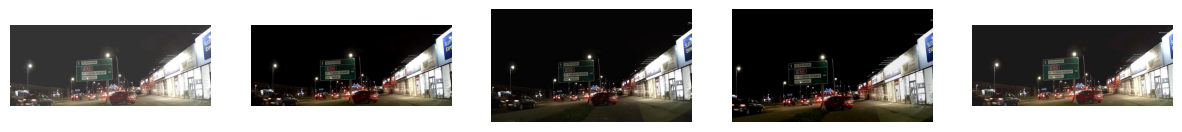

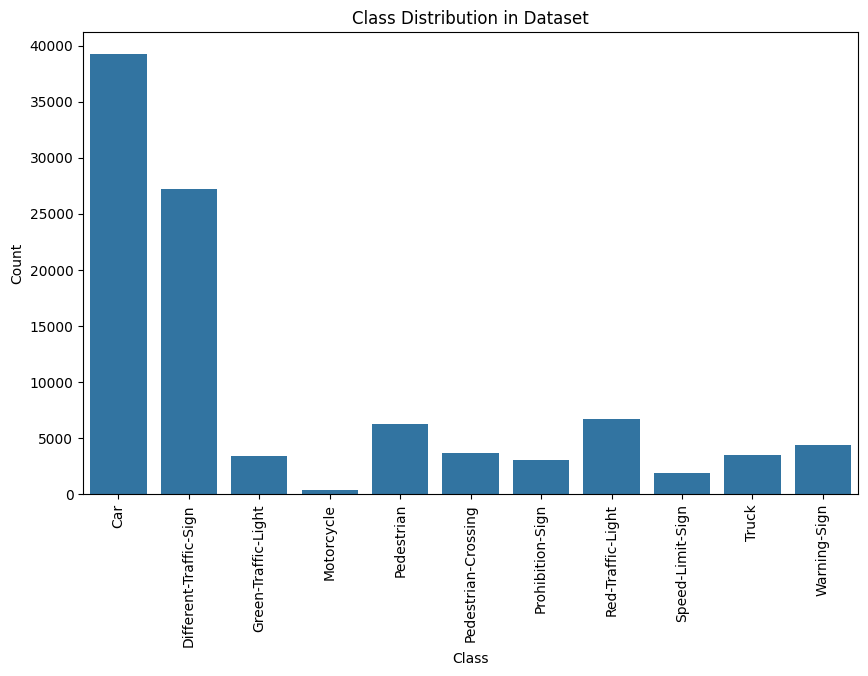

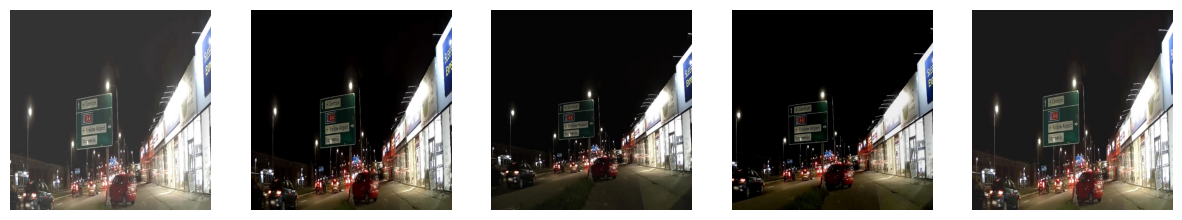

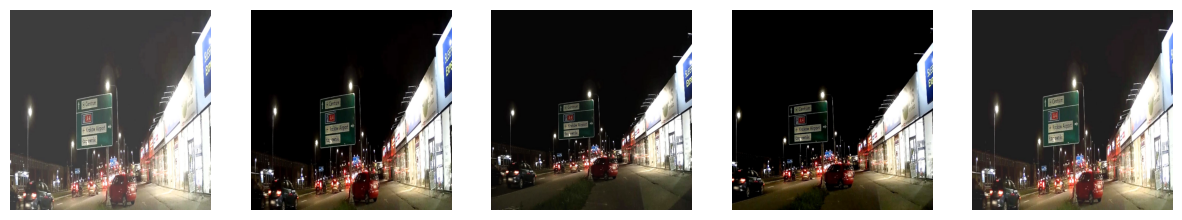

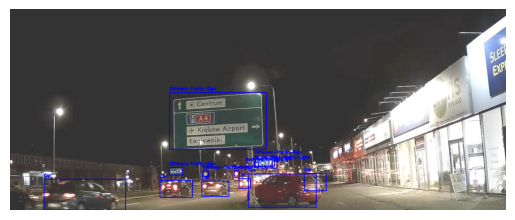

In [3]:
# To explore and preprocess this dataset for object detection, the following code will cover:
#Data Loading: Reading the image and annotation data.
#Basic Exploration: Visualizing images and class distributions.
#Preprocessing: Applying common image transformations and checking the annotations.
#Data Augmentation: Creating additional variations to enhance the model’s performance.
#This code assumes you have organized the dataset locally with images and annotations in a YOLO-compatible structure.

import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
import numpy as np
from PIL import Image

# Define the path for images and annotations
image_dir = 'C:\\Users\\obee\Documents\\vsc\\archive 1\\road_detection\\road_detection\\train\\images'
annotation_dir = 'C:\\Users\\obee\\Documents\\vsc\\archive 1\\road_detection\\road_detection\\train\\labels'

# Classes present in the dataset
classes = ["Car", "Different-Traffic-Sign", "Green-Traffic-Light", "Motorcycle", 
           "Pedestrian", "Pedestrian-Crossing", "Prohibition-Sign", 
           "Red-Traffic-Light", "Speed-Limit-Sign", "Truck", "Warning-Sign"]

# Load image and annotation paths
image_paths = glob(os.path.join(image_dir, '*.jpg'))  # Adjust extension if different
annotation_paths = glob(os.path.join(annotation_dir, '*.txt'))

# Data Exploration
print(f"Total Images: {len(image_paths)}")
print(f"Total Annotations: {len(annotation_paths)}")

# Sample visualization
def visualize_sample_images(image_paths, n=5):
    plt.figure(figsize=(15, 10))
    for i, img_path in enumerate(image_paths[:n]):
        img = Image.open(img_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

visualize_sample_images(image_paths)

# Class distribution
def get_class_distribution(annotation_paths, classes):
    class_counts = {cls: 0 for cls in classes}
    for annotation_path in annotation_paths:
        with open(annotation_path, 'r') as file:
            lines = file.readlines()
            for line in lines:
                class_id = int(line.split()[0])
                class_name = classes[class_id]
                class_counts[class_name] += 1
    return class_counts

class_distribution = get_class_distribution(annotation_paths, classes)
class_df = pd.DataFrame(list(class_distribution.items()), columns=['Class', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', data=class_df)
plt.xticks(rotation=90)
plt.title("Class Distribution in Dataset")
plt.show()

# Data Preprocessing
def preprocess_images(image_paths, target_size=(640, 640)):
    processed_images = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.resize(img, target_size)
        processed_images.append(img)
    return processed_images

processed_images = preprocess_images(image_paths[:5])  # Display first few processed images

# Visualize preprocessed images
plt.figure(figsize=(15, 10))
for i, img in enumerate(processed_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

# Data Augmentation (example of brightness adjustment)
def augment_brightness(image, factor=1.5):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype=np.float64)
    hsv[:, :, 2] = hsv[:, :, 2] * factor
    hsv[:, :, 2][hsv[:, :, 2] > 255] = 255
    hsv = np.array(hsv, dtype=np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

# Visualize augmented images
augmented_images = [augment_brightness(img, factor=1.2) for img in processed_images]

plt.figure(figsize=(15, 10))
for i, img in enumerate(augmented_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

# Annotation parsing and checking sample coordinates
def load_yolo_annotations(file_path):
    boxes = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            boxes.append((class_id, x_center, y_center, width, height))
    return boxes

# Visualize sample image with bounding boxes
def plot_boxes(img_path, annotation_path):
    img = cv2.imread(img_path)
    h, w, _ = img.shape
    boxes = load_yolo_annotations(annotation_path)

    for box in boxes:
        class_id, x_center, y_center, box_width, box_height = box
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)
        
        class_name = classes[int(class_id)]
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Plot a sample image with bounding boxes
plot_boxes(image_paths[0], annotation_paths[0])


In [1]:
# antrenare
from ultralytics import YOLO

model = YOLO('yolov8n.pt') 
model.train(data='data.yaml', epochs=100, imgsz=640, batch=32)

Ultralytics 8.3.57  Python-3.12.8 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=200, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

train: Scanning C:\Users\obee\Documents\vsc\archive 1\road_detection\road_detection\train\labels.cache... 10474 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10474/10474 [00:00<?, ?it/s]
val: Scanning C:\Users\obee\Documents\vsc\archive 1\road_detection\road_detection\valid\labels.cache... 935 images, 0 backgrounds, 0 corrupt: 100%|██████████| 935/935 [00:00<?, ?it/s]


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      4.53G      1.524      2.135      1.093        262        640: 100%|██████████| 328/328 [01:05<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.38it/s]

                   all        935       8981      0.461      0.315      0.329      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      5.42G      1.415       1.21       1.05         89        640: 100%|██████████| 328/328 [01:02<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.74it/s]


                   all        935       8981      0.605      0.435      0.472      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      5.54G      1.413      1.128      1.048        142        640: 100%|██████████| 328/328 [01:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.72it/s]


                   all        935       8981      0.626      0.455      0.464      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      5.15G      1.412      1.063      1.052        149        640: 100%|██████████| 328/328 [01:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.64it/s]


                   all        935       8981      0.657      0.463      0.492      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      5.18G      1.357     0.9458      1.031        130        640: 100%|██████████| 328/328 [01:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.85it/s]


                   all        935       8981      0.678      0.473      0.534      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      5.28G      1.316       0.88      1.017        140        640: 100%|██████████| 328/328 [01:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.80it/s]


                   all        935       8981      0.703      0.511      0.558      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      5.36G      1.292     0.8362       1.01        101        640: 100%|██████████| 328/328 [01:02<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.77it/s]


                   all        935       8981      0.697      0.532      0.571      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      4.91G      1.267     0.8027          1        220        640: 100%|██████████| 328/328 [01:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.78it/s]

                   all        935       8981      0.705      0.514      0.574      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      5.06G       1.25     0.7766     0.9935        222        640: 100%|██████████| 328/328 [01:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.85it/s]


                   all        935       8981      0.696      0.541       0.59      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      5.26G      1.231     0.7526      0.986        166        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.88it/s]


                   all        935       8981       0.75      0.567      0.629      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      6.04G      1.213     0.7338     0.9807        136        640: 100%|██████████| 328/328 [01:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.86it/s]


                   all        935       8981      0.746      0.589      0.632      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      5.71G      1.197     0.7161     0.9753        137        640: 100%|██████████| 328/328 [01:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.88it/s]


                   all        935       8981      0.742      0.581      0.638       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      5.59G      1.183     0.7022     0.9687        133        640: 100%|██████████| 328/328 [01:02<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.83it/s]

                   all        935       8981      0.748      0.573      0.636      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      5.83G      1.171     0.6939     0.9661        127        640: 100%|██████████| 328/328 [01:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.81it/s]

                   all        935       8981      0.772      0.589      0.646      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      5.25G      1.161     0.6803     0.9618        173        640: 100%|██████████| 328/328 [01:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.83it/s]


                   all        935       8981      0.764       0.59      0.659      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      5.11G      1.151     0.6701     0.9593        224        640: 100%|██████████| 328/328 [01:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.82it/s]


                   all        935       8981      0.767      0.597      0.653      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200       5.6G      1.141     0.6643     0.9546        165        640: 100%|██████████| 328/328 [01:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.92it/s]

                   all        935       8981      0.772      0.591      0.661      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      5.87G      1.134      0.655     0.9527        176        640: 100%|██████████| 328/328 [01:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.84it/s]


                   all        935       8981      0.778      0.603      0.667      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      5.51G      1.119     0.6448     0.9491        217        640: 100%|██████████| 328/328 [01:00<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.84it/s]

                   all        935       8981      0.749      0.623      0.667      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      4.97G      1.111     0.6372     0.9445        208        640: 100%|██████████| 328/328 [01:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.89it/s]


                   all        935       8981      0.803      0.608      0.675      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      5.63G      1.101     0.6275      0.942        156        640: 100%|██████████| 328/328 [01:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.89it/s]


                   all        935       8981      0.739      0.625      0.676      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      6.67G      1.093     0.6251     0.9395        121        640: 100%|██████████| 328/328 [01:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.70it/s]


                   all        935       8981      0.806      0.614      0.688      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      5.32G      1.087      0.618      0.937        137        640: 100%|██████████| 328/328 [01:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.89it/s]

                   all        935       8981      0.792      0.618      0.681      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      5.02G      1.081     0.6125     0.9347        144        640: 100%|██████████| 328/328 [01:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.94it/s]

                   all        935       8981      0.795      0.612      0.681      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      5.42G      1.072     0.6058      0.933        192        640: 100%|██████████| 328/328 [01:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.76it/s]


                   all        935       8981      0.779       0.61      0.677      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      5.19G      1.065     0.6005     0.9305        171        640: 100%|██████████| 328/328 [01:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.79it/s]

                   all        935       8981      0.796      0.619      0.687      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      5.25G      1.056     0.5957     0.9284        202        640: 100%|██████████| 328/328 [01:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


                   all        935       8981      0.788      0.637      0.696      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      5.92G      1.052     0.5928     0.9265        217        640: 100%|██████████| 328/328 [01:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.69it/s]

                   all        935       8981      0.797       0.63      0.696      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      5.29G      1.045     0.5861     0.9257        148        640: 100%|██████████| 328/328 [01:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.77it/s]

                   all        935       8981        0.8      0.629      0.699      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      5.56G      1.043     0.5851      0.924        189        640: 100%|██████████| 328/328 [01:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.96it/s]

                   all        935       8981      0.818      0.635      0.689      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      5.56G      1.034     0.5792     0.9223        217        640: 100%|██████████| 328/328 [01:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.86it/s]

                   all        935       8981      0.778      0.641      0.691      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      6.09G      1.029     0.5757     0.9195        178        640: 100%|██████████| 328/328 [01:00<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.88it/s]

                   all        935       8981      0.812      0.636      0.702      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      5.72G       1.02     0.5699     0.9175        179        640: 100%|██████████| 328/328 [01:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.89it/s]

                   all        935       8981      0.783      0.642      0.703      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      5.02G      1.017     0.5695      0.917        149        640: 100%|██████████| 328/328 [01:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.89it/s]

                   all        935       8981        0.8      0.643      0.703      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      6.16G      1.011     0.5632     0.9152        236        640: 100%|██████████| 328/328 [01:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.82it/s]

                   all        935       8981      0.818      0.643      0.708      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      5.03G      1.007     0.5622     0.9133         97        640: 100%|██████████| 328/328 [01:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.98it/s]

                   all        935       8981      0.818       0.64      0.703      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      6.09G      1.003     0.5586     0.9137        113        640: 100%|██████████| 328/328 [01:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.96it/s]

                   all        935       8981      0.823      0.639      0.713      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      6.08G          1     0.5561     0.9114        145        640: 100%|██████████| 328/328 [01:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.71it/s]

                   all        935       8981      0.801      0.665      0.714      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      4.92G     0.9924     0.5508     0.9081        161        640: 100%|██████████| 328/328 [01:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.91it/s]

                   all        935       8981      0.819      0.649      0.711      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      5.41G     0.9922     0.5504     0.9081        171        640: 100%|██████████| 328/328 [01:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  5.00it/s]

                   all        935       8981      0.806      0.645      0.715      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      5.73G      0.985     0.5483     0.9081        190        640: 100%|██████████| 328/328 [01:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.80it/s]

                   all        935       8981      0.809      0.651      0.715      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      5.87G     0.9823     0.5455     0.9063        259        640: 100%|██████████| 328/328 [01:00<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.89it/s]

                   all        935       8981      0.801      0.659       0.71       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      5.32G     0.9784     0.5426     0.9062        134        640: 100%|██████████| 328/328 [01:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.87it/s]

                   all        935       8981      0.817      0.661       0.72      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      5.87G     0.9731     0.5383     0.9037        176        640: 100%|██████████| 328/328 [01:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.77it/s]

                   all        935       8981      0.814       0.65      0.714      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      5.55G     0.9695     0.5371     0.9037        186        640: 100%|██████████| 328/328 [01:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.91it/s]

                   all        935       8981      0.809      0.656      0.719      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      5.58G     0.9671     0.5342     0.9021        142        640: 100%|██████████| 328/328 [01:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.94it/s]

                   all        935       8981      0.803      0.657      0.713      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      5.96G     0.9596     0.5298        0.9        139        640: 100%|██████████| 328/328 [01:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.87it/s]

                   all        935       8981      0.791      0.672      0.714      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200       5.1G     0.9585     0.5294     0.9006        165        640: 100%|██████████| 328/328 [01:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.90it/s]

                   all        935       8981      0.799      0.661      0.711      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      4.96G     0.9589      0.528     0.8998        123        640: 100%|██████████| 328/328 [01:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.93it/s]

                   all        935       8981      0.814      0.656      0.712      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      5.32G     0.9508     0.5261      0.899        159        640: 100%|██████████| 328/328 [01:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.87it/s]

                   all        935       8981      0.809      0.655      0.713      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      5.43G     0.9454     0.5233     0.8963        222        640: 100%|██████████| 328/328 [01:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.84it/s]

                   all        935       8981      0.806      0.666      0.719      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200       5.6G     0.9424     0.5187     0.8948        126        640: 100%|██████████| 328/328 [01:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.97it/s]

                   all        935       8981      0.815      0.654      0.715      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      5.13G     0.9413     0.5204     0.8953        179        640: 100%|██████████| 328/328 [01:03<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.89it/s]

                   all        935       8981      0.815      0.646      0.711      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      5.26G     0.9342     0.5163     0.8938        146        640: 100%|██████████| 328/328 [01:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.84it/s]

                   all        935       8981      0.805      0.654      0.714      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      5.72G     0.9297     0.5142     0.8927        134        640: 100%|██████████| 328/328 [01:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.97it/s]

                   all        935       8981      0.816      0.662      0.718      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      5.41G     0.9289     0.5135     0.8927        176        640: 100%|██████████| 328/328 [01:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.87it/s]

                   all        935       8981      0.824      0.651      0.715      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      5.75G     0.9307     0.5137     0.8924        219        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.74it/s]

                   all        935       8981      0.831      0.652      0.715      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200       5.6G     0.9258     0.5119      0.891        211        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.59it/s]

                   all        935       8981      0.838      0.645      0.713      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      6.19G     0.9229     0.5105     0.8914        259        640: 100%|██████████| 328/328 [01:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.83it/s]

                   all        935       8981      0.821      0.663       0.72       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      6.13G     0.9232     0.5081     0.8898        166        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.77it/s]

                   all        935       8981      0.814      0.662       0.72      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      5.16G      0.916     0.5048     0.8879        164        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.72it/s]

                   all        935       8981      0.827      0.658      0.719      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      5.88G     0.9169      0.505     0.8879        167        640: 100%|██████████| 328/328 [01:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.80it/s]


                   all        935       8981      0.828       0.66       0.72      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      6.04G     0.9118     0.5017     0.8867        202        640: 100%|██████████| 328/328 [01:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.95it/s]

                   all        935       8981      0.811      0.668       0.72      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      5.06G     0.9128     0.5021     0.8891        207        640: 100%|██████████| 328/328 [01:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.82it/s]

                   all        935       8981      0.812       0.67      0.721      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      6.52G     0.9041     0.4981     0.8859        212        640: 100%|██████████| 328/328 [01:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.76it/s]

                   all        935       8981       0.82      0.665      0.722      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      5.26G     0.9081     0.5005     0.8854        116        640: 100%|██████████| 328/328 [01:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.95it/s]

                   all        935       8981      0.818      0.666      0.721      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      5.91G      0.903     0.4977     0.8842        200        640: 100%|██████████| 328/328 [01:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.84it/s]

                   all        935       8981       0.82      0.669      0.726       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      6.01G     0.9023     0.4951     0.8842        141        640: 100%|██████████| 328/328 [01:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.02it/s]

                   all        935       8981      0.835      0.667      0.727      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      6.49G     0.8966     0.4945     0.8836        167        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.87it/s]

                   all        935       8981      0.829      0.669      0.728      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      5.02G     0.8934      0.493     0.8823        155        640: 100%|██████████| 328/328 [01:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.95it/s]

                   all        935       8981      0.813      0.677      0.728      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      5.61G       0.89     0.4892     0.8821        147        640: 100%|██████████| 328/328 [01:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.81it/s]

                   all        935       8981      0.817      0.678      0.727      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      5.74G     0.8912     0.4913     0.8813        144        640: 100%|██████████| 328/328 [01:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.68it/s]


                   all        935       8981      0.817      0.669      0.727      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200       5.7G     0.8857     0.4878     0.8808        190        640: 100%|██████████| 328/328 [01:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.96it/s]

                   all        935       8981      0.824      0.667      0.729      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      5.79G      0.883     0.4885     0.8811        159        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.95it/s]

                   all        935       8981      0.821      0.669      0.729      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      5.48G     0.8827     0.4844     0.8792        176        640: 100%|██████████| 328/328 [01:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.76it/s]

                   all        935       8981      0.832      0.663      0.727      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      5.67G     0.8802     0.4831     0.8783        209        640: 100%|██████████| 328/328 [01:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.93it/s]

                   all        935       8981      0.838      0.665      0.728       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      5.84G     0.8767     0.4833     0.8776        198        640: 100%|██████████| 328/328 [01:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.82it/s]

                   all        935       8981       0.83      0.669      0.725       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      5.85G      0.876      0.482     0.8793        105        640: 100%|██████████| 328/328 [01:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.80it/s]

                   all        935       8981      0.829      0.668      0.724       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      6.31G     0.8774     0.4841     0.8787        144        640: 100%|██████████| 328/328 [01:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.76it/s]

                   all        935       8981       0.83      0.666      0.724      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      4.66G     0.8697     0.4789     0.8764        215        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.99it/s]

                   all        935       8981      0.826      0.665      0.723      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      5.74G     0.8714     0.4807     0.8764        186        640: 100%|██████████| 328/328 [01:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.88it/s]

                   all        935       8981      0.824       0.67      0.724      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      4.83G     0.8653     0.4784     0.8774        187        640: 100%|██████████| 328/328 [01:03<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.49it/s]

                   all        935       8981      0.827      0.663      0.724       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200       5.2G      0.865     0.4758     0.8751        182        640: 100%|██████████| 328/328 [01:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.41it/s]


                   all        935       8981      0.826      0.666      0.724       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      5.35G     0.8632      0.476     0.8741        100        640: 100%|██████████| 328/328 [01:02<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.39it/s]

                   all        935       8981      0.819      0.671      0.724       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      5.98G     0.8613     0.4742     0.8746        196        640: 100%|██████████| 328/328 [01:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.38it/s]

                   all        935       8981      0.816      0.675      0.725      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      4.97G     0.8562     0.4717     0.8735        191        640: 100%|██████████| 328/328 [01:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.54it/s]


                   all        935       8981      0.814      0.678      0.725      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200       6.1G       0.86     0.4736     0.8743        119        640: 100%|██████████| 328/328 [01:02<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.50it/s]

                   all        935       8981      0.813       0.68      0.726      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      5.58G     0.8569     0.4709      0.873        207        640: 100%|██████████| 328/328 [01:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.47it/s]

                   all        935       8981      0.815      0.677      0.727      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      6.12G      0.856     0.4713     0.8731        141        640: 100%|██████████| 328/328 [01:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.35it/s]

                   all        935       8981       0.82      0.678      0.727      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      5.35G     0.8495     0.4684     0.8719        126        640: 100%|██████████| 328/328 [01:02<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.39it/s]

                   all        935       8981      0.819      0.679      0.728      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      5.58G      0.849     0.4679      0.872        144        640: 100%|██████████| 328/328 [01:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.39it/s]

                   all        935       8981      0.818      0.677      0.728      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      5.47G     0.8469     0.4658     0.8722        173        640: 100%|██████████| 328/328 [01:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.42it/s]

                   all        935       8981      0.822      0.674      0.729      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      5.85G     0.8485     0.4676     0.8716        170        640: 100%|██████████| 328/328 [01:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.42it/s]

                   all        935       8981      0.821      0.673      0.729      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      6.45G     0.8427      0.465     0.8694        173        640: 100%|██████████| 328/328 [01:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.48it/s]

                   all        935       8981      0.819      0.674      0.728      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      6.65G     0.8417      0.464     0.8698        173        640: 100%|██████████| 328/328 [01:02<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.55it/s]

                   all        935       8981      0.826      0.672       0.73      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      5.57G     0.8393     0.4636       0.87        114        640: 100%|██████████| 328/328 [01:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.39it/s]

                   all        935       8981       0.83       0.67      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      5.53G     0.8404     0.4627     0.8703        154        640: 100%|██████████| 328/328 [01:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.50it/s]

                   all        935       8981      0.829      0.671      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      5.97G     0.8359     0.4608     0.8693        110        640: 100%|██████████| 328/328 [01:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.46it/s]

                   all        935       8981      0.825      0.673      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200       5.4G     0.8326     0.4581      0.867        166        640: 100%|██████████| 328/328 [01:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.41it/s]

                   all        935       8981      0.822      0.674      0.729      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      5.41G     0.8303     0.4576     0.8671        164        640: 100%|██████████| 328/328 [01:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.32it/s]

                   all        935       8981      0.822      0.671      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      5.11G     0.8315     0.4575     0.8667        212        640: 100%|██████████| 328/328 [01:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.48it/s]

                   all        935       8981      0.823      0.671       0.73      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      6.38G     0.8306     0.4571      0.867        133        640: 100%|██████████| 328/328 [01:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.50it/s]

                   all        935       8981      0.824       0.67      0.731      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      5.52G     0.8257     0.4569     0.8659        187        640: 100%|██████████| 328/328 [01:02<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.54it/s]

                   all        935       8981      0.828      0.669       0.73      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      6.06G     0.8238     0.4547     0.8666        192        640: 100%|██████████| 328/328 [01:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.47it/s]

                   all        935       8981      0.828       0.67      0.731      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      5.35G     0.8239     0.4544     0.8666        209        640: 100%|██████████| 328/328 [01:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.41it/s]

                   all        935       8981      0.831      0.668      0.731      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      5.92G     0.8224      0.454     0.8655        177        640: 100%|██████████| 328/328 [01:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.35it/s]


                   all        935       8981      0.832      0.668       0.73      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      6.12G     0.8184     0.4516     0.8641        143        640: 100%|██████████| 328/328 [01:02<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.47it/s]

                   all        935       8981      0.838      0.665      0.731      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      5.28G     0.8173     0.4496     0.8642        178        640: 100%|██████████| 328/328 [01:02<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.46it/s]

                   all        935       8981      0.829      0.669       0.73      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      5.31G     0.8177     0.4505     0.8643        177        640: 100%|██████████| 328/328 [01:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.52it/s]

                   all        935       8981       0.83      0.667      0.729      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      5.57G      0.814     0.4495     0.8642        150        640: 100%|██████████| 328/328 [01:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.54it/s]

                   all        935       8981      0.829      0.666      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      6.35G     0.8127     0.4482     0.8636        162        640: 100%|██████████| 328/328 [01:03<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.45it/s]

                   all        935       8981      0.828      0.668      0.728      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      5.54G     0.8106     0.4477     0.8631        149        640: 100%|██████████| 328/328 [01:02<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.44it/s]

                   all        935       8981      0.822      0.672      0.728      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      5.65G     0.8114      0.448     0.8632        141        640: 100%|██████████| 328/328 [01:01<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.45it/s]

                   all        935       8981      0.825      0.672      0.728      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      6.36G     0.8084     0.4446     0.8615        155        640: 100%|██████████| 328/328 [01:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.36it/s]

                   all        935       8981      0.818      0.676      0.729      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200       5.6G     0.8072     0.4465     0.8619        168        640: 100%|██████████| 328/328 [01:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.33it/s]

                   all        935       8981      0.822      0.673      0.729      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      5.03G     0.8055     0.4444     0.8615        188        640: 100%|██████████| 328/328 [01:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.34it/s]

                   all        935       8981      0.822      0.673       0.73      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      6.01G     0.8018     0.4423     0.8611        248        640: 100%|██████████| 328/328 [01:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.48it/s]

                   all        935       8981      0.824      0.673       0.73      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      5.64G     0.8016     0.4431     0.8606        139        640: 100%|██████████| 328/328 [01:02<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.48it/s]

                   all        935       8981      0.808      0.682       0.73      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      5.82G     0.7973     0.4417      0.861        169        640: 100%|██████████| 328/328 [01:03<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.86it/s]

                   all        935       8981      0.815      0.676      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      5.15G     0.7987     0.4409     0.8609        229        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.76it/s]

                   all        935       8981      0.818      0.676      0.729      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      6.78G     0.7967     0.4404     0.8605        167        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.83it/s]

                   all        935       8981      0.817      0.676      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      5.99G     0.7956     0.4404     0.8599        154        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.88it/s]

                   all        935       8981      0.817      0.676      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      5.86G     0.7912     0.4363     0.8582        180        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.87it/s]

                   all        935       8981      0.811       0.68      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      5.56G     0.7899     0.4368     0.8594        210        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.85it/s]

                   all        935       8981      0.808       0.68      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      6.21G     0.7912     0.4366     0.8579        173        640: 100%|██████████| 328/328 [01:02<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.87it/s]

                   all        935       8981      0.807      0.679      0.729      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      5.49G     0.7836     0.4342     0.8565        206        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.91it/s]

                   all        935       8981      0.806      0.681      0.729      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200       6.1G     0.7861     0.4346     0.8578        169        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.86it/s]

                   all        935       8981      0.809      0.679      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200       5.8G     0.7883      0.434     0.8571        152        640: 100%|██████████| 328/328 [01:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.79it/s]

                   all        935       8981      0.811      0.677      0.729      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      5.53G       0.78     0.4316     0.8563        179        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.83it/s]

                   all        935       8981      0.811      0.676      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      4.97G     0.7847     0.4326     0.8569        189        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.95it/s]

                   all        935       8981      0.809      0.679      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      5.73G     0.7781     0.4296      0.856        147        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.82it/s]

                   all        935       8981       0.81      0.678      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      5.78G     0.7761     0.4296     0.8551        133        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.82it/s]

                   all        935       8981       0.81      0.678      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      6.13G     0.7759     0.4297     0.8556        188        640: 100%|██████████| 328/328 [01:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.90it/s]

                   all        935       8981      0.808       0.68       0.73      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      6.03G     0.7785     0.4314     0.8562        189        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.93it/s]

                   all        935       8981      0.811      0.678      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      6.19G     0.7739     0.4282     0.8554        155        640: 100%|██████████| 328/328 [01:01<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.77it/s]

                   all        935       8981      0.806      0.681      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      4.93G     0.7721     0.4274     0.8541        143        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.85it/s]

                   all        935       8981      0.814      0.677      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      5.41G     0.7704     0.4264     0.8558        216        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.93it/s]

                   all        935       8981      0.815      0.677      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      5.08G     0.7691     0.4249     0.8536        153        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.85it/s]

                   all        935       8981      0.811      0.678      0.728      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      5.39G     0.7698     0.4254     0.8535        116        640: 100%|██████████| 328/328 [01:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.81it/s]

                   all        935       8981      0.811      0.678      0.728      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      4.76G     0.7645     0.4218     0.8523        143        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.74it/s]

                   all        935       8981      0.813      0.677      0.728      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      5.52G     0.7652     0.4217     0.8528        163        640: 100%|██████████| 328/328 [01:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.90it/s]

                   all        935       8981      0.816      0.676      0.728      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      7.13G     0.7612     0.4208     0.8529        177        640: 100%|██████████| 328/328 [01:01<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.80it/s]

                   all        935       8981      0.815      0.676      0.728      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      5.15G     0.7595     0.4207     0.8529        175        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.88it/s]

                   all        935       8981      0.819      0.673      0.728      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      5.24G     0.7601     0.4199     0.8515        237        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.94it/s]

                   all        935       8981      0.821      0.671      0.728      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      4.97G     0.7571     0.4193     0.8519        222        640: 100%|██████████| 328/328 [01:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.98it/s]

                   all        935       8981       0.82      0.672      0.728      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      5.65G      0.756     0.4181     0.8506        178        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.71it/s]

                   all        935       8981      0.822       0.67      0.728      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      6.07G     0.7553     0.4165     0.8503        145        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.80it/s]

                   all        935       8981      0.821      0.671      0.729      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      5.71G     0.7513     0.4155     0.8494        189        640: 100%|██████████| 328/328 [01:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.91it/s]

                   all        935       8981      0.822      0.669      0.728      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      6.54G      0.749     0.4146     0.8498        164        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.88it/s]

                   all        935       8981      0.821      0.669      0.728      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200       5.5G     0.7468     0.4139     0.8487        171        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.72it/s]

                   all        935       8981      0.822       0.67      0.728      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      4.71G     0.7478     0.4145     0.8494        171        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.87it/s]

                   all        935       8981      0.824      0.669      0.728      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      5.72G     0.7454     0.4126     0.8489        171        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.88it/s]


                   all        935       8981      0.825      0.668      0.728      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      5.61G     0.7423     0.4113     0.8487        186        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.96it/s]

                   all        935       8981      0.825      0.668      0.728      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      5.21G     0.7398     0.4094     0.8479        147        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.76it/s]

                   all        935       8981      0.824      0.669      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      6.32G     0.7399     0.4094     0.8482        189        640: 100%|██████████| 328/328 [01:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.74it/s]

                   all        935       8981      0.828      0.668      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      5.44G     0.7375     0.4087     0.8481        113        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.90it/s]

                   all        935       8981      0.826      0.668      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      6.34G      0.739     0.4085     0.8477        161        640: 100%|██████████| 328/328 [01:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.86it/s]

                   all        935       8981      0.829      0.667      0.729      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      5.41G     0.7325     0.4061     0.8468        172        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.80it/s]

                   all        935       8981      0.828      0.667      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      5.98G     0.7323     0.4062     0.8464        186        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.87it/s]

                   all        935       8981      0.826      0.668      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200         5G      0.735     0.4066     0.8471        191        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.93it/s]

                   all        935       8981      0.825      0.669      0.729      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      6.37G     0.7295     0.4046     0.8462        191        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.87it/s]

                   all        935       8981      0.826      0.669      0.729      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      4.95G      0.728     0.4036     0.8451        251        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.79it/s]

                   all        935       8981      0.825      0.669      0.729      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      6.25G     0.7271      0.403     0.8448        128        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.75it/s]

                   all        935       8981      0.825      0.669      0.729      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      6.12G     0.7252     0.4029      0.846        212        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.87it/s]

                   all        935       8981      0.827      0.668      0.729      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      5.47G     0.7199      0.399     0.8441        190        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.82it/s]

                   all        935       8981       0.83      0.667      0.729      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      5.04G      0.722     0.3995     0.8438        156        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.79it/s]

                   all        935       8981      0.828      0.667      0.729      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      5.37G     0.7157     0.3978     0.8431        158        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.92it/s]

                   all        935       8981      0.833      0.666      0.729      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      5.81G     0.7152     0.3981     0.8428        155        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.87it/s]

                   all        935       8981      0.835      0.664      0.729      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      5.35G     0.7161     0.3976     0.8431        160        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.78it/s]

                   all        935       8981      0.829      0.666      0.729      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      6.04G     0.7115     0.3961     0.8427        286        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.93it/s]

                   all        935       8981      0.832      0.665      0.728      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      5.23G     0.7149     0.3968     0.8423        199        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.86it/s]

                   all        935       8981      0.833      0.664      0.728      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      4.58G     0.7133     0.3944     0.8419        223        640: 100%|██████████| 328/328 [01:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.81it/s]

                   all        935       8981      0.833      0.664      0.728      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      6.19G     0.7091      0.393     0.8416        186        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.79it/s]

                   all        935       8981      0.838      0.663      0.729      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200         6G     0.7114     0.3957      0.842        205        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.95it/s]

                   all        935       8981       0.84      0.662      0.728      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      5.03G     0.7059     0.3923     0.8414        147        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.90it/s]

                   all        935       8981       0.84      0.661      0.728      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200       6.3G     0.7054     0.3911     0.8409        205        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.79it/s]

                   all        935       8981       0.84      0.661      0.728      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      5.46G     0.7045     0.3908     0.8409        170        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.89it/s]

                   all        935       8981      0.839      0.661      0.728      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      4.86G     0.7034     0.3908     0.8408        174        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.83it/s]

                   all        935       8981      0.838       0.66      0.728      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      5.56G     0.7008     0.3893     0.8413        168        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.92it/s]

                   all        935       8981      0.837      0.659      0.728      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      5.51G     0.6983     0.3875     0.8394        211        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.82it/s]

                   all        935       8981      0.837       0.66      0.728      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      6.07G     0.7001     0.3881     0.8396        166        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.80it/s]

                   all        935       8981      0.836      0.661      0.728      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      6.43G     0.6944     0.3862     0.8395        125        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.96it/s]

                   all        935       8981      0.836       0.66      0.728      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      6.22G     0.6928     0.3846     0.8391        221        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.83it/s]

                   all        935       8981      0.837       0.66      0.728      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      5.24G     0.6906     0.3836     0.8387        188        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.68it/s]

                   all        935       8981      0.838       0.66      0.728      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      5.49G     0.6861     0.3822     0.8382        217        640: 100%|██████████| 328/328 [01:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.87it/s]

                   all        935       8981      0.837       0.66      0.729      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      4.77G     0.6876     0.3816     0.8371        142        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.90it/s]

                   all        935       8981      0.836       0.66      0.729      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      5.24G     0.6861     0.3813     0.8381        140        640: 100%|██████████| 328/328 [01:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.81it/s]

                   all        935       8981      0.837      0.659      0.729      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      5.26G     0.6846     0.3808     0.8378        200        640: 100%|██████████| 328/328 [01:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.81it/s]

                   all        935       8981      0.836      0.658      0.729      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200       5.6G     0.6849     0.3815     0.8371        242        640: 100%|██████████| 328/328 [01:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.90it/s]

                   all        935       8981      0.836      0.659      0.729      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      6.06G     0.6846     0.3806     0.8372        199        640: 100%|██████████| 328/328 [01:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.90it/s]

                   all        935       8981      0.836      0.658      0.729      0.436


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      4.43G     0.6473     0.3528     0.8218         54        640: 100%|██████████| 328/328 [00:59<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.85it/s]

                   all        935       8981      0.834      0.659      0.729      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      4.42G     0.6269     0.3437     0.8192         96        640: 100%|██████████| 328/328 [00:59<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.90it/s]

                   all        935       8981      0.835      0.658      0.729      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      4.41G     0.6213      0.341     0.8183         75        640: 100%|██████████| 328/328 [00:59<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.72it/s]

                   all        935       8981      0.838      0.658      0.729      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      4.41G     0.6161     0.3385     0.8177         73        640: 100%|██████████| 328/328 [00:59<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.85it/s]

                   all        935       8981      0.815      0.669      0.729      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200       4.4G     0.6113     0.3377     0.8172        102        640: 100%|██████████| 328/328 [00:59<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.81it/s]

                   all        935       8981      0.826      0.664      0.729      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      4.41G     0.6082     0.3356     0.8167        114        640: 100%|██████████| 328/328 [00:59<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.90it/s]

                   all        935       8981      0.826      0.663      0.729      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      4.42G     0.6051     0.3343     0.8168         77        640: 100%|██████████| 328/328 [00:59<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.90it/s]

                   all        935       8981      0.814       0.67      0.729      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      4.41G     0.6042     0.3334     0.8162         67        640: 100%|██████████| 328/328 [00:59<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.96it/s]

                   all        935       8981      0.814      0.668      0.728      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      4.35G     0.6011      0.332      0.815        111        640: 100%|██████████| 328/328 [00:59<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.71it/s]

                   all        935       8981      0.814      0.669      0.729      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      4.44G     0.5983     0.3312      0.815         83        640: 100%|██████████| 328/328 [00:59<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.85it/s]

                   all        935       8981      0.816      0.668      0.728      0.436



200 epochs completed in 3.611 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.2MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.57  Python-3.12.8 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
Model summary (fused): 168 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.19it/s]


                   all        935       8981      0.836       0.66      0.728      0.437
                   Car        906       3593      0.896      0.826      0.894      0.627
Different-Traffic-Sign        671       2479      0.891      0.675      0.791      0.458
   Green-Traffic-Light        105        219      0.789      0.731       0.75      0.453
            Motorcycle         28         28          1      0.768      0.834      0.515
            Pedestrian        202        578      0.718      0.571       0.65      0.288
   Pedestrian-Crossing        178        271      0.773      0.613      0.647      0.369
      Prohibition-Sign        209        280      0.845      0.668      0.786      0.429
     Red-Traffic-Light        238        606      0.936      0.889      0.914      0.619
      Speed-Limit-Sign        115        149      0.683      0.376      0.404      0.238
                 Truck        221        359      0.788      0.589      0.673      0.436
          Warning-Sig

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000015171CFD3D0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [2]:
# evaluare model
metrics = model.val(data='data.yaml', imgsz=640)
print(metrics)

Ultralytics 8.3.57  Python-3.12.8 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
Model summary (fused): 168 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\obee\Documents\vsc\archive 1\road_detection\road_detection\valid\labels.cache... 935 images, 0 backgrounds, 0 corrupt: 100%|██████████| 935/935 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.36it/s]


                   all        935       8981      0.837      0.661      0.729      0.437
                   Car        906       3593      0.895      0.826      0.894      0.627
Different-Traffic-Sign        671       2479      0.891      0.674       0.79       0.46
   Green-Traffic-Light        105        219      0.797      0.735      0.753      0.453
            Motorcycle         28         28          1      0.768      0.834      0.504
            Pedestrian        202        578      0.719      0.574      0.651      0.291
   Pedestrian-Crossing        178        271      0.766      0.613      0.641      0.368
      Prohibition-Sign        209        280      0.845      0.668      0.787      0.428
     Red-Traffic-Light        238        606      0.939      0.891      0.917      0.621
      Speed-Limit-Sign        115        149      0.685      0.376      0.407      0.244
                 Truck        221        359      0.788      0.589      0.675      0.436
          Warning-Sig

In [4]:
#evaluare model pe un video

import cv2
from ultralytics import YOLO
import pygame
import numpy as np
from pygame.locals import *

model = YOLO('C:\\Users\\obee\\Documents\\vsc\\runs\\detect\\train3\\weights\\best.pt')

video_path = 'C:\\Users\\obee\\Documents\\vsc\\video.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Nu se poate deschide videoclipul.")
    exit()

def detect_objects(frame):
    results = model(frame)
    annotated_frame = results[0].plot()
    return annotated_frame

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    annotated_frame = detect_objects(frame)

    cv2.imshow('Testare model', annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
pygame.init()

screen_width = 1280
screen_height = 720
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Detectare obiecte')

model = YOLO('C:\\Users\\obee\\Documents\\vsc\\runs\\detect\\train3\\weights\\best.pt')

def detect_objects(frame):
    results = model(frame)
    annotated_frame = results[0].plot()
    return annotated_frame

def convert_frame_to_surface(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = np.rot90(frame)
    frame = pygame.surfarray.make_surface(frame)
    return frame

running = True
while running:
    for event in pygame.event.get():
        if event.type == QUIT:
            running = False

    ret, frame = cap.read()
    if not ret:
        break

    annotated_frame = detect_objects(frame)

    frame_surface = convert_frame_to_surface(annotated_frame)

    screen.blit(frame_surface, (0, 0))
    pygame.display.update()

cap.release()
pygame.quit()


0: 384x640 1 Car, 9.8ms
Speed: 0.0ms preprocess, 9.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 5.3ms
Speed: 0.0ms preprocess, 5.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 0.0ms
Speed: 0.0ms preprocess, 0.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 0.0ms
Speed: 0.0ms preprocess, 0.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 5.5ms
Speed: 0.0ms preprocess, 5.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 0.0ms
Speed: 0.0ms preprocess, 0.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 0.0ms
Speed: 0.0ms preprocess, 0.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 5.2ms
Speed: 0.0ms preprocess, 5.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 5.3ms
Speed: 

In [5]:
import pygame
from ultralytics import YOLO
import random
import cv2
import numpy as np
import os

pygame.init()

WIDTH, HEIGHT = 1280, 720
FPS = 60

screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Smart Traffic Control System")
clock = pygame.time.Clock()

model = YOLO('C:\\Users\\obee\\Documents\\vsc\\runs\\detect\\train\\weights\\best.pt')

background = pygame.image.load("intersection.png")

def load_and_scale_car(path):
    img = pygame.image.load(path)
    return pygame.transform.scale(img, (40, 80))

class TrafficLight:
    def __init__(self, position, direction):
        self.position = position
        self.direction = direction
        self.state = "RED"
        self.timer = 0
        self.min_green_time = 10
        self.max_green_time = 30
        self.yellow_time = 3
        
    def draw(self, screen):
        if self.state == "RED":
            color = (255, 0, 0)
        elif self.state == "YELLOW":
            color = (255, 255, 0)
        else:
            color = (0, 255, 0)
            
        pygame.draw.rect(screen, (50, 50, 50), (self.position[0], self.position[1], 15, 40))
        pygame.draw.circle(screen, color, (self.position[0] + 7, self.position[1] + 20), 6)

class Car:
    def __init__(self, direction, offset=0):
        self.direction = direction
        self.speed = 2
        
        if direction == "N":
            self.x = 345
            self.y = HEIGHT + offset
            self.image = pygame.transform.scale(pygame.image.load("car_north.png"), (40, 50))
        elif direction == "S":
            self.x = 310
            self.y = -80 - offset
            self.image = pygame.transform.rotate(pygame.transform.scale(pygame.image.load("car_north.png"), (40, 50)), 180)
        elif direction == "E":
            self.x = -80 - offset
            self.y = 380
            self.image = pygame.transform.rotate(pygame.transform.scale(pygame.image.load("car_north.png"), (40, 50)), 270)
        elif direction == "W":
            self.x = WIDTH + offset
            self.y = 340
            self.image = pygame.transform.rotate(pygame.transform.scale(pygame.image.load("car_north.png"), (40, 50)), 90)

    def move(self, can_move):
        if not can_move:
            return
            
        if self.direction == "N":
            self.y -= self.speed
        elif self.direction == "E":
            self.x += self.speed
        elif self.direction == "S":
            self.y += self.speed
        elif self.direction == "W":
            self.x -= self.speed

    def draw(self, screen):
        screen.blit(self.image, (self.x, self.y))

    def is_visible(self):
        return -100 <= self.x <= WIDTH + 100 and -100 <= self.y <= HEIGHT + 100

class TrafficSystem:
    def __init__(self):
        self.traffic_lights = {
            "N": TrafficLight((345, 300), "N"),  # ajustat pentru nord, inainte de trecerea de pietoni
            "S": TrafficLight((310, 400), "S"),  # ajustat pentru sud, inainte de trecerea de pietoni
            "E": TrafficLight((400, 380), "E"),  # ajustat pentru est, inainte de trecerea de pietoni
            "W": TrafficLight((270, 340), "W")   # ajustat pentru vest, inainte de trecerea de pietoni
        }
        self.cars = []
        self.last_analysis = 0
        self.analysis_interval = 5 * FPS
        self.spawn_rates = {"N": 0.3, "S": 0.3, "E": 0.3, "W": 0.3}
        self.min_car_distance = 100  # distanta minima intre masini

    def update_traffic_lights(self, traffic_counts):
        total_cars = sum(traffic_counts.values())
        if total_cars == 0:
            for light in self.traffic_lights.values():
                if light.timer == 0:
                    light.state = "GREEN"
                    light.timer = light.min_green_time
            return

        for direction, count in traffic_counts.items():
            light = self.traffic_lights[direction]
            if count > 0:
                ratio = count / total_cars
                green_time = int(light.min_green_time + 
                               ratio * (light.max_green_time - light.min_green_time))
                light.timer = max(light.timer, green_time)

        for light in self.traffic_lights.values():
            if light.timer > 0:
                light.timer -= 1
                if light.timer <= light.yellow_time and light.state == "GREEN":
                    light.state = "YELLOW"
                elif light.timer == 0:
                    light.state = "RED"
            else:
                others_red = all(l.state == "RED" for l in self.traffic_lights.values() 
                               if l != light)
                if others_red:
                    light.state = "GREEN"
                    light.timer = light.min_green_time

    def can_spawn_car(self, direction):
        for car in self.cars:
            if car.direction != direction:
                continue
                
            if direction == "N" and car.y > HEIGHT - self.min_car_distance:
                return False
            elif direction == "S" and car.y < 0 + self.min_car_distance:
                return False
            elif direction == "E" and car.x < 0 + self.min_car_distance:
                return False
            elif direction == "W" and car.x > WIDTH - self.min_car_distance:
                return False
        return True

    def spawn_car(self):
        for direction in ["N", "S", "E", "W"]:
            if random.random() < self.spawn_rates[direction] and self.can_spawn_car(direction):
                # offset random pentru a evita coliziunile
                offset = random.randint(0, 50)
                self.cars.append(Car(direction, offset))

    def analyze_traffic(self):
        pygame.image.save(screen, "temp_screenshot.jpg")
        frame = cv2.imread("temp_screenshot.jpg")
        results = model(frame)
        detections = results[0].boxes.data.cpu().numpy()
        
        counts = {"N": 0, "E": 0, "S": 0, "W": 0}
        
        for detection in detections:
            x_center = (detection[0] + detection[2]) / 2
            y_center = (detection[1] + detection[3]) / 2
            confidence = detection[4]
            
            if confidence < 0.5:
                continue
                
            if y_center < HEIGHT/2 and WIDTH/3 < x_center < 2*WIDTH/3:
                counts["N"] += 1
            elif x_center > WIDTH/2 and HEIGHT/3 < y_center < 2*HEIGHT/3:
                counts["E"] += 1
            elif y_center > HEIGHT/2 and WIDTH/3 < x_center < 2*WIDTH/3:
                counts["S"] += 1
            elif x_center < WIDTH/2 and HEIGHT/3 < y_center < 2*HEIGHT/3:
                counts["W"] += 1
        
        if os.path.exists("temp_screenshot.jpg"):
            os.remove("temp_screenshot.jpg")
        return counts

    def update(self):
        if pygame.time.get_ticks() - self.last_analysis > self.analysis_interval:
            traffic_counts = self.analyze_traffic()
            self.update_traffic_lights(traffic_counts)
            self.last_analysis = pygame.time.get_ticks()

        self.cars = [car for car in self.cars if car.is_visible()]
        for car in self.cars:
            car.move(self.traffic_lights[car.direction].state == "GREEN")

    def draw(self, screen):
        for light in self.traffic_lights.values():
            light.draw(screen)
        for car in self.cars:
            car.draw(screen)

def main():
    traffic_system = TrafficSystem()
    spawn_timer = 0
    running = True

    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        spawn_timer += 1
        if spawn_timer >= FPS // 2:
            traffic_system.spawn_car()
            spawn_timer = 0

        screen.blit(background, (0, 0))
        traffic_system.update()
        traffic_system.draw(screen)
        
        pygame.display.flip()
        clock.tick(FPS)

    pygame.quit()

if __name__ == "__main__":
    main()


0: 384x640 2 Trucks, 5.2ms
Speed: 1.0ms preprocess, 5.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Trucks, 5.5ms
Speed: 0.0ms preprocess, 5.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Trucks, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Trucks, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Trucks, 4.5ms
Speed: 1.0ms preprocess, 4.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Trucks, 5.5ms
Speed: 0.0ms preprocess, 5.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Trucks, 8.3ms
Speed: 0.0ms preprocess, 8.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Trucks, 5.1ms
Speed: 0.0ms preprocess, 5.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x

In [1]:
#mini-game trafic
import random
import time
import threading
import pygame
import sys
from PIL import Image
from ultralytics import YOLO
import cv2
import numpy as np

model = YOLO('C:\\Users\\obee\\Documents\\vsc\\runs\\detect\\train3\\weights\\best.pt')

defaultGreen = {0:10, 1:10, 2:10, 3:10}
defaultRed = 40
defaultYellow = 3

signals = []
noOfSignals = 4
currentGreen = 0 
nextGreen = (currentGreen+1)%noOfSignals   
currentYellow = 0 

speeds = {'car':2.25, 'bus':1.8, 'truck':1.8, 'bike':2.5} 

x = {'right':[0,0,0], 'down':[755,727,697], 'left':[1400,1400,1400], 'up':[602,627,657]}    
y = {'right':[348,370,398], 'down':[0,0,0], 'left':[498,466,436], 'up':[800,800,800]}

vehicles = {'right': {0:[], 1:[], 2:[], 'crossed':0}, 'down': {0:[], 1:[], 2:[], 'crossed':0}, 
           'left': {0:[], 1:[], 2:[], 'crossed':0}, 'up': {0:[], 1:[], 2:[], 'crossed':0}}
vehicleTypes = {0:'car', 1:'bus', 2:'truck', 3:'bike'}
directionNumbers = {0:'right', 1:'down', 2:'left', 3:'up'}

signalCoods = [(530,230),(810,230),(810,570),(530,570)]
signalTimerCoods = [(530,210),(810,210),(810,550),(530,550)]

stopLines = {'right': 590, 'down': 330, 'left': 800, 'up': 535}
defaultStop = {'right': 580, 'down': 320, 'left': 810, 'up': 545}

stoppingGap = 15  
movingGap = 15   

pygame.init()
simulation = pygame.sprite.Group()

class TrafficController:
    def __init__(self):
        self.vehicle_counts = {'right': 0, 'down': 0, 'left': 0, 'up': 0}
        self.traffic_lights = {'right': None, 'down': None, 'left': None, 'up': None}
        self.last_detection_time = time.time()
        self.detection_interval = 1.0

    def analyze_frame(self, frame):
        frame_array = pygame.surfarray.pixels3d(frame)
        frame_bgr = cv2.cvtColor(frame_array, cv2.COLOR_RGB2BGR)

        original_height, original_width = frame_bgr.shape[:2]

        frame_resized = cv2.resize(frame_bgr, (640, 640))
        
        
        results = model(frame_resized, verbose=False)
        
        self.vehicle_counts = {'right': 0, 'down': 0, 'left': 0, 'up': 0}
        
        for r in results:
            boxes = r.boxes
            for box in boxes:
                cls = int(box.cls[0])
                conf = float(box.conf[0])
                
                if conf > 0.3:  
                    if cls in [0, 3, 9]:  # masina motor troaca
                        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                        
                        x_center = (x1 + x2) / 2 / 640 * original_width
                        y_center = (y1 + y2) / 2 / 640 * original_height
                        
                        if x_center < original_width / 3:
                            self.vehicle_counts['right'] += 1
                        elif x_center > 2 * original_width / 3:
                            self.vehicle_counts['left'] += 1
                        elif y_center < original_height / 3:
                            self.vehicle_counts['down'] += 1
                        else:
                            self.vehicle_counts['up'] += 1

    def get_optimal_signal_timings(self):
        total_vehicles = sum(self.vehicle_counts.values())
        if total_vehicles == 0:
            return defaultGreen
        
        new_timings = {}
        min_green = 10
        max_green = 30
        
        for direction in self.vehicle_counts:
            count = self.vehicle_counts[direction]
            proportion = count / total_vehicles if total_vehicles > 0 else 0.25
            green_time = int(min_green + (max_green - min_green) * proportion)
            direction_to_index = {'right': 0, 'down': 1, 'left': 2, 'up': 3}
            new_timings[direction_to_index[direction]] = green_time
            
        return new_timings

def update_signal_timings(traffic_controller):
    while True:
        try:
            current_time = time.time()
            if current_time - traffic_controller.last_detection_time >= traffic_controller.detection_interval:
                frame = pygame.display.get_surface()
                if frame is not None:
                    frame = frame.copy()
                    traffic_controller.analyze_frame(frame)
                    new_timings = traffic_controller.get_optimal_signal_timings()
                    
                    if currentYellow == 0:
                        for i in range(noOfSignals):
                            if i != currentGreen:
                                signals[i].green = new_timings[i]
                    
                    traffic_controller.last_detection_time = current_time
        except (pygame.error, AttributeError):
            break
        except Exception as e:
            print(f"Error in update_signal_timings: {e}")
        time.sleep(0.1)

class TrafficSignal:
    def __init__(self, red, yellow, green):
        self.red = red
        self.yellow = yellow
        self.green = green
        self.signalText = ""
        
class Vehicle(pygame.sprite.Sprite):
    def __init__(self, lane, vehicleClass, direction_number, direction):
        pygame.sprite.Sprite.__init__(self)
        self.lane = lane
        self.vehicleClass = vehicleClass
        self.speed = speeds[vehicleClass]
        self.direction_number = direction_number
        self.direction = direction
        self.x = x[direction][lane]
        self.y = y[direction][lane]
        self.crossed = 0
        vehicles[direction][lane].append(self)
        self.index = len(vehicles[direction][lane]) - 1
        path = "images/" + direction + "/" + vehicleClass + ".png"
        self.image = pygame.image.load(path)

        if(len(vehicles[direction][lane])>1 and vehicles[direction][lane][self.index-1].crossed==0):
            if(direction=='right'):
                self.stop = vehicles[direction][lane][self.index-1].stop - vehicles[direction][lane][self.index-1].image.get_rect().width - stoppingGap
            elif(direction=='left'):
                self.stop = vehicles[direction][lane][self.index-1].stop + vehicles[direction][lane][self.index-1].image.get_rect().width + stoppingGap
            elif(direction=='down'):
                self.stop = vehicles[direction][lane][self.index-1].stop - vehicles[direction][lane][self.index-1].image.get_rect().height - stoppingGap
            elif(direction=='up'):
                self.stop = vehicles[direction][lane][self.index-1].stop + vehicles[direction][lane][self.index-1].image.get_rect().height + stoppingGap
        else:
            self.stop = defaultStop[direction]
        
        if(direction=='right'):
            temp = self.image.get_rect().width + stoppingGap    
            x[direction][lane] -= temp
        elif(direction=='left'):
            temp = self.image.get_rect().width + stoppingGap
            x[direction][lane] += temp
        elif(direction=='down'):
            temp = self.image.get_rect().height + stoppingGap
            y[direction][lane] -= temp
        elif(direction=='up'):
            temp = self.image.get_rect().height + stoppingGap
            y[direction][lane] += temp
        simulation.add(self)

    def move(self):
        if(self.direction=='right'):
            if(self.crossed==0 and self.x+self.image.get_rect().width>stopLines[self.direction]):
                self.crossed = 1
            if((self.x+self.image.get_rect().width<=self.stop or self.crossed == 1 or (currentGreen==0 and currentYellow==0)) and (self.index==0 or self.x+self.image.get_rect().width<(vehicles[self.direction][self.lane][self.index-1].x - movingGap))):
                self.x += self.speed
        elif(self.direction=='down'):
            if(self.crossed==0 and self.y+self.image.get_rect().height>stopLines[self.direction]):
                self.crossed = 1
            if((self.y+self.image.get_rect().height<=self.stop or self.crossed == 1 or (currentGreen==1 and currentYellow==0)) and (self.index==0 or self.y+self.image.get_rect().height<(vehicles[self.direction][self.lane][self.index-1].y - movingGap))):
                self.y += self.speed
        elif(self.direction=='left'):
            if(self.crossed==0 and self.x<stopLines[self.direction]):
                self.crossed = 1
            if((self.x>=self.stop or self.crossed == 1 or (currentGreen==2 and currentYellow==0)) and (self.index==0 or self.x>(vehicles[self.direction][self.lane][self.index-1].x + vehicles[self.direction][self.lane][self.index-1].image.get_rect().width + movingGap))):
                self.x -= self.speed
        elif(self.direction=='up'):
            if(self.crossed==0 and self.y<stopLines[self.direction]):
                self.crossed = 1
            if((self.y>=self.stop or self.crossed == 1 or (currentGreen==3 and currentYellow==0)) and (self.index==0 or self.y>(vehicles[self.direction][self.lane][self.index-1].y + vehicles[self.direction][self.lane][self.index-1].image.get_rect().height + movingGap))):
                self.y -= self.speed

def initialize():
    ts1 = TrafficSignal(0, defaultYellow, defaultGreen[0])
    signals.append(ts1)
    ts2 = TrafficSignal(ts1.red+ts1.yellow+ts1.green, defaultYellow, defaultGreen[1])
    signals.append(ts2)
    ts3 = TrafficSignal(defaultRed, defaultYellow, defaultGreen[2])
    signals.append(ts3)
    ts4 = TrafficSignal(defaultRed, defaultYellow, defaultGreen[3])
    signals.append(ts4)
    repeat()

def repeat():
    global currentGreen, currentYellow, nextGreen
    while(signals[currentGreen].green>0):
        updateValues()
        time.sleep(1)
    currentYellow = 1
    for i in range(0,3):
        for vehicle in vehicles[directionNumbers[currentGreen]][i]:
            vehicle.stop = defaultStop[directionNumbers[currentGreen]]
    while(signals[currentGreen].yellow>0):
        updateValues()
        time.sleep(1)
    currentYellow = 0
    
    signals[currentGreen].green = defaultGreen[currentGreen]
    signals[currentGreen].yellow = defaultYellow
    signals[currentGreen].red = defaultRed
    
    currentGreen = nextGreen
    nextGreen = (currentGreen+1)%noOfSignals
    signals[nextGreen].red = signals[currentGreen].yellow+signals[currentGreen].green
    repeat()

def updateValues():
    global lastUpdate
    current_time = time.time()

    if not hasattr(updateValues, "lastUpdate"):
        updateValues.last_update = current_time
    elif current_time - updateValues.last_update < 1:
        return
    
    updateValues.last_update = current_time

    for i in range(0, noOfSignals):
        if(i==currentGreen):
            if(currentYellow==0):
                signals[i].green-=1
            else:
                signals[i].yellow-=1
        else:
            signals[i].red-=1

def generateVehicles():
    while(True):
        vehicle_type = random.randint(0,3)
        lane_number = random.randint(1,2)
        temp = random.randint(0,99)
        direction_number = 0
        dist = [25,50,75,100]
        if(temp<dist[0]):
            direction_number = 0
        elif(temp<dist[1]):
            direction_number = 1
        elif(temp<dist[2]):
            direction_number = 2
        elif(temp<dist[3]):
            direction_number = 3
        Vehicle(lane_number, vehicleTypes[vehicle_type], direction_number, directionNumbers[direction_number])
        time.sleep(1)

class Main:
    def __init__(self):
        self.running = True 
        
        traffic_controller = TrafficController()
        self.thread_traffic = threading.Thread(target=update_signal_timings, args=(traffic_controller,))
        self.thread_traffic.daemon = True
        self.thread_traffic.start()

        self.thread1 = threading.Thread(name="initialization", target=initialize, args=())
        self.thread1.daemon = True
        self.thread1.start()

        self.black = (0, 0, 0)
        self.white = (255, 255, 255)
        self.screenWidth = 1400
        self.screenHeight = 800
        self.screenSize = (self.screenWidth, self.screenHeight)
        self.background = pygame.image.load('images/intersection.png')
        self.screen = pygame.display.set_mode(self.screenSize)
        pygame.display.set_caption("joculetz")

        self.redSignal = pygame.image.load('images/signals/red.png')
        self.yellowSignal = pygame.image.load('images/signals/yellow.png')
        self.greenSignal = pygame.image.load('images/signals/green.png')
        self.font = pygame.font.Font(None, 30)

        self.thread2 = threading.Thread(name="generateVehicles", target=generateVehicles, args=())
        self.thread2.daemon = True
        self.thread2.start()

        self.clock = pygame.time.Clock()
        self.game_loop()

    def clean_exit(self):
        self.running = False
        pygame.quit()
        sys.exit()

    def game_loop(self):
        while self.running:
            self.clock.tick(60)

            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    self.clean_exit()
                elif event.type == pygame.KEYDOWN:
                    if event.key == pygame.K_q:
                        self.clean_exit()

            if not self.running:
                break

            self.screen.blit(self.background, (0,0))

            for i in range(0, noOfSignals):
                if(i==currentGreen):
                    if(currentYellow==1):
                        signals[i].signalText = signals[i].yellow
                        self.screen.blit(self.yellowSignal, signalCoods[i])
                    else:
                        signals[i].signalText = signals[i].green
                        self.screen.blit(self.greenSignal, signalCoods[i])
                else:
                    if(signals[i].red<=10):
                        signals[i].signalText = signals[i].red
                    else:
                        signals[i].signalText = "---"
                    self.screen.blit(self.redSignal, signalCoods[i])

                signalTexts = ["","","",""]

                for i in range(0, noOfSignals):
                    signalTexts[i] = self.font.render(str(signals[i].signalText), True, self.white, self.black)
                    self.screen.blit(signalTexts[i], signalTimerCoods[i])

                for vehicle in simulation:
                    self.screen.blit(vehicle.image, (vehicle.x, vehicle.y))
                    vehicle.move()
                    
            try:
                pygame.display.update()
            except pygame.error:
                break

if __name__ == "__main__":
    main = Main()           

pygame 2.6.1 (SDL 2.28.4, Python 3.12.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

C:\Users\obee\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
